ValueError: could not convert string to float: '2.58%'

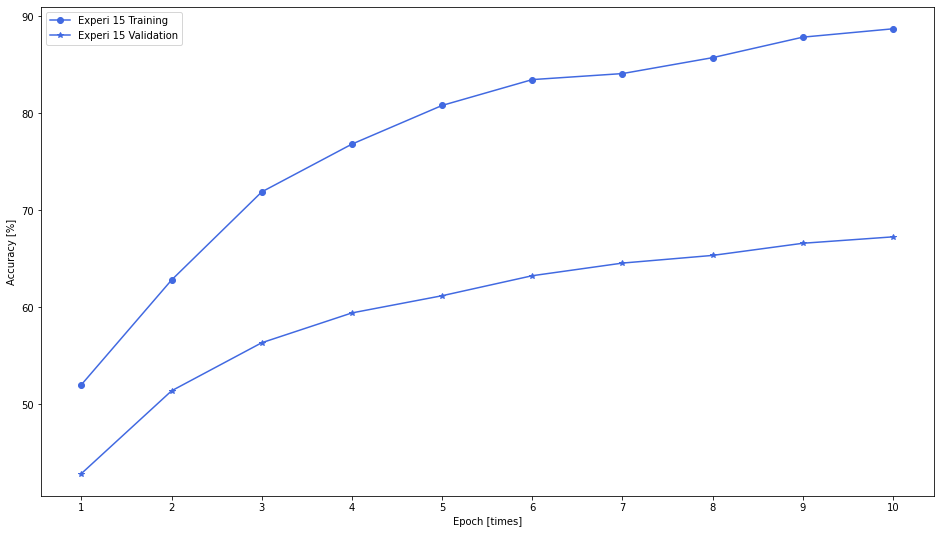

In [25]:
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#Input Definition
view_type = 'all' #comparing mode 0,1,2
comparing_mode = 2 #comparing mode 0,1,2
experi_num1 = 12 #comparing mode 0,1,2
experi_num2 = 13 #comparing mode 1
experi_list = [15,16,17,18] #comparing mode 2


# Don't touch the code below this line.
if comparing_mode == 0: # Plotting an experiment result
    #Input Refinement
    log_path = '/opt/ml/code/WRAITH/level1-image-classification-level1-cv-06/KTH/model/exp'+str(experi_num1)+'/log.txt'
    log = open(log_path)
    f = log.readlines()
    
    #Experiment Data Refinement
    Maximum_training_acc = [0.0 for _ in range(10)]
    Validation_acc = [0.0 for _ in range(10)]
    val_idx = 0
    for i in range(len(f)):
        if f[i][1:4] == "Val":
            tgt = f[i].split(' : ')
            Validation_acc[val_idx] = float(tgt[1][:5])
            val_idx += 1
        elif f[i][0:5] == "Epoch":
            train_idx = int(f[i][6])
            Maximum_training_acc[train_idx] = max(Maximum_training_acc[train_idx],float(f[i][-19:-14]))

    #Plotting Figure
    fig, ax = plt.subplots(1,1,figsize=(16,9),sharey=True)
    if view_type == 'all' or view_type == 'train':
        ax.plot(np.arange(1,11), Maximum_training_acc, c='#FF0000', label='Training', marker='o')
    if view_type == 'all' or view_type == 'val':
        ax.plot(np.arange(1,11), Validation_acc, c='#00FF00', label='Validation', marker='o')
    ax.set_xlabel('Epoch [times]')
    ax.set_xticks(np.arange(1,11))
    ax.set_ylabel('Accuracy [%]')
    ax.legend()
    fig.suptitle('Experiment '+str(experi_num1))
    plt.show()
    
elif comparing_mode == 1: # Plotting two experiments result at once
    #Input Refinement
    log_path1 = '/opt/ml/code/WRAITH/level1-image-classification-level1-cv-06/KTH/model/exp'+str(experi_num1)+'/log.txt'
    log1 = open(log_path1)
    f1 = log1.readlines()
    log_path2 = '/opt/ml/code/WRAITH/level1-image-classification-level1-cv-06/KTH/model/exp'+str(experi_num2)+'/log.txt'
    log2 = open(log_path2)
    f2 = log2.readlines()
    
    #Experiment 1 Data Refinement
    Maximum_training_acc1 = [0.0 for _ in range(10)]
    Validation_acc1 = [0.0 for _ in range(10)]
    val_idx = 0
    for i in range(len(f1)):
        if f1[i][1:4] == "Val":
            tgt = f1[i].split(' : ')
            Validation_acc1[val_idx] = float(tgt[1][:5])
            val_idx += 1
        if f1[i][0:5] == "Epoch":
            train_idx = int(f1[i][6])
            Maximum_training_acc1[train_idx] = max(Maximum_training_acc1[train_idx],float(f1[i][-19:-14]))
    #Experiment 2 Data Refinement
    Maximum_training_acc2 = [0.0 for _ in range(10)]
    Validation_acc2 = [0.0 for _ in range(10)]
    val_idx = 0
    for i in range(len(f2)):
        if f2[i][1:4] == "Val":
            tgt = f2[i].split(' : ')
            Validation_acc2[val_idx] = float(tgt[1][:5])
            val_idx += 1
        elif f2[i][0:5] == "Epoch":
            train_idx = int(f2[i][6])
            Maximum_training_acc2[train_idx] = max(Maximum_training_acc2[train_idx],float(f2[i][-19:-14]))
    #Plotting Figure
    fig, ax = plt.subplots(1,1,figsize=(16,9),sharey=True)
    if view_type == 'all' or view_type == 'train':
        ax.plot(np.arange(1,11), Maximum_training_acc1, c='#AAAA00', label='Experi 1 Training', marker='o')
        ax.plot(np.arange(1,11), Maximum_training_acc2, c='#009999', label='Experi 2 Training', marker='o')
    if view_type == 'all' or view_type == 'val':
        ax.plot(np.arange(1,11), Validation_acc1, c='#AAAA00', label='Experi 1 Validation', marker='*')
        ax.plot(np.arange(1,11), Validation_acc2, c='#009999', label='Experi 2 Validation', marker='*')
    ax.set_xlabel('Epoch [times]')
    ax.set_xticks(np.arange(1,11))
    ax.set_ylabel('Accuracy [%]')
    ax.legend()
    fig.suptitle('Experiment '+str(experi_num1))
    plt.show()

elif comparing_mode == 2: # Plotting a list of experiment result
    #Base Data Refinement
    colorlist = ['royalblue','darkgreen','tomato','lightgreen','silver','purple','orange']
    fig, ax = plt.subplots(1,1,figsize=(16,9),sharey=True)
    for idx, experi_num in enumerate(experi_list):
        #Input Refinement
        log_path = '/opt/ml/code/WRAITH/level1-image-classification-level1-cv-06/KTH/model/exp'+str(experi_num)+'/log.txt'
        log = open(log_path)
        f = log.readlines()
    
        #Experiment Data Refinement
        Maximum_training_acc = [0.0 for _ in range(10)]
        Validation_acc = [0.0 for _ in range(10)]
        val_idx = 0
        for i in range(len(f)):
            if f[i][1:4] == "Val":
                tgt = f[i].split(' : ')
                Validation_acc[val_idx] = float(tgt[1][:5])
                val_idx += 1
            elif f[i][0:5] == "Epoch":
                train_idx = int(f[i][6])
                Maximum_training_acc[train_idx] = max(Maximum_training_acc[train_idx],float(f[i][-19:-14]))
                
        #Plotting Figure
        if view_type == 'all' or view_type == 'train':
            ax.plot(np.arange(1,11), Maximum_training_acc, c=colorlist[idx], label='Experi '+str(experi_num)+' Training', marker='o')
        if view_type == 'all' or view_type == 'val':
            ax.plot(np.arange(1,11), Validation_acc, c=colorlist[idx], label='Experi '+str(experi_num)+' Validation', marker='*')
        ax.set_xlabel('Epoch [times]')
        ax.set_xticks(np.arange(1,11))
        ax.set_ylabel('Accuracy [%]')
        ax.legend()
    fig.suptitle('Experiment Result')
    plt.show()
